<a href="https://colab.research.google.com/github/Kairory/ML-python_study/blob/main/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_5_%D1%80%D0%B0%D0%B7%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%BD%D0%B0_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%B5_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Подготовка данных

https://www.cs.toronto.edu/~kriz/cifar.html
• Самолет.
• Автомобиль.
• Птица.
• Кошка.
• Олень.
• Собака.
• Лягушка.
• Лошадь.
• Корабль.
• Грузовик.

In [2]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2025-11-17 13:58:24--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  49.4MB/s    in 3.6s    

2025-11-17 13:58:28 (44.7 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [ ]:
# Примечание
# Кроме официального репозитория набор CIFAR-10 так-же доступен в виде набора данных TensorFlow.
# Подключить его можно с помощью следующих команд:
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

In [3]:
!tar -xvzf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [4]:
def unpickle(file):
    import pickle
    with open(file, "rb") as fo: # read binary as file object
        data_dict = pickle.load(fo, encoding="bytes")
        return data_dict

In [5]:
def load_data(file_path):
    x_train = None
    y_train = None

    for i in [1, 2, 3, 4, 5]: # range(1, 6)
        db_dict = unpickle(file_path+"data_batch_"+str(i))
        data_points = len(db_dict[b"data"])
        data = db_dict[b"data"]\
                            .reshape((data_points, 3, 32, 32))\
                            .transpose((0, 2, 3, 1))
        if x_train is None:
            x_train = data
            y_train = db_dict[b"labels"]
        else:
            x_train = np.concatenate((x_train, data))
            y_train = np.concatenate((y_train, db_dict[b"labels"]))

    db_dict = unpickle(file_path+"test_batch")
    data_points = len(db_dict[b"data"])
    x_test = db_dict[b"data"]\
                        .reshape((data_points, 3, 32, 32))\
                        .transpose((0, 2, 3, 1))
    y_test = np.array(db_dict[b"labels"])

    return (x_train, y_train), (x_test, y_test)

In [6]:
meta_dict = unpickle("./cifar-10-batches-py/batches.meta")
meta_dict[b"label_names"]

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [7]:
(x_train, y_train), (x_test, y_test) = load_data("./cifar-10-batches-py/")
x_train, x_test = x_train/255.0 , x_test/255.0
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000,)
(10000,)


label value: 9
label name: b'truck'


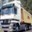

In [8]:
i = 1
print(f"label value: {y_train[i]}\nlabel name: {meta_dict[b"label_names"][y_train[i]]}")
tf.keras.utils.array_to_img(x_train[i])

# Создание CNN модели

In [21]:
def create_model():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same")(inputs)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same")(inputs)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(128, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    predictions = tf.keras.layers.Dense(10, activation="softmax")(x)

    model = tf.keras.models.Model(inputs=inputs, outputs=predictions)
    return model

Также можно было убрать Dropout и мосле каждого Dense слоя поставить:

x = tf.keras.layers.Dense(128, activation='relu', kernel_
regularizer=tf.keras.regularizers.l2(0.1))(x)

x = tf.keras.layers.BatchNormalization()(x)

Пакетная нормализация ускоряет обучение и в какой-то мере способствует регуляризации.

In [22]:
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [23]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, steps_per_epoch=200,
                    verbose=2, validation_steps=50, validation_split=0.2)

Epoch 1/50
200/200 - 12s - 60ms/step - loss: 2.1849 - sparse_categorical_accuracy: 0.1781 - val_loss: 1.9892 - val_sparse_categorical_accuracy: 0.2950
Epoch 2/50
200/200 - 1s - 5ms/step - loss: 1.9138 - sparse_categorical_accuracy: 0.2752 - val_loss: 1.8563 - val_sparse_categorical_accuracy: 0.2975
Epoch 3/50
200/200 - 1s - 5ms/step - loss: 1.7514 - sparse_categorical_accuracy: 0.3356 - val_loss: 1.6548 - val_sparse_categorical_accuracy: 0.3625
Epoch 4/50
200/200 - 1s - 6ms/step - loss: 1.6660 - sparse_categorical_accuracy: 0.3767 - val_loss: 1.5611 - val_sparse_categorical_accuracy: 0.4137
Epoch 5/50
200/200 - 1s - 6ms/step - loss: 1.5695 - sparse_categorical_accuracy: 0.4169 - val_loss: 1.5385 - val_sparse_categorical_accuracy: 0.4437
Epoch 6/50
200/200 - 1s - 5ms/step - loss: 1.5460 - sparse_categorical_accuracy: 0.4366 - val_loss: 1.4590 - val_sparse_categorical_accuracy: 0.4675
Epoch 7/50
200/200 - 0s - 2ms/step - loss: 1.4617 - sparse_categorical_accuracy: 0.4644 - val_loss: 1.39

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 - 1s - 5ms/step - loss: 1.4580 - sparse_categorical_accuracy: 0.4583 - val_loss: 1.3642 - val_sparse_categorical_accuracy: 0.4981
Epoch 9/50
200/200 - 1s - 5ms/step - loss: 1.4418 - sparse_categorical_accuracy: 0.4727 - val_loss: 1.4058 - val_sparse_categorical_accuracy: 0.4787
Epoch 10/50
200/200 - 1s - 5ms/step - loss: 1.3896 - sparse_categorical_accuracy: 0.4956 - val_loss: 1.3092 - val_sparse_categorical_accuracy: 0.5294
Epoch 11/50
200/200 - 1s - 5ms/step - loss: 1.3513 - sparse_categorical_accuracy: 0.5098 - val_loss: 1.2322 - val_sparse_categorical_accuracy: 0.5375
Epoch 12/50
200/200 - 1s - 5ms/step - loss: 1.3140 - sparse_categorical_accuracy: 0.5241 - val_loss: 1.2657 - val_sparse_categorical_accuracy: 0.5319
Epoch 13/50
200/200 - 1s - 5ms/step - loss: 1.2835 - sparse_categorical_accuracy: 0.5372 - val_loss: 1.2057 - val_sparse_categorical_accuracy: 0.5750
Epoch 14/50
200/200 - 0s - 2ms/step - loss: 1.2865 - sparse_categorical_accuracy: 0.5331 - val_loss: 1.1656 - val

In [24]:
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.6941 - sparse_categorical_accuracy: 0.7580
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8596 - sparse_categorical_accuracy: 0.6956


[0.8649693131446838, 0.6956999897956848]

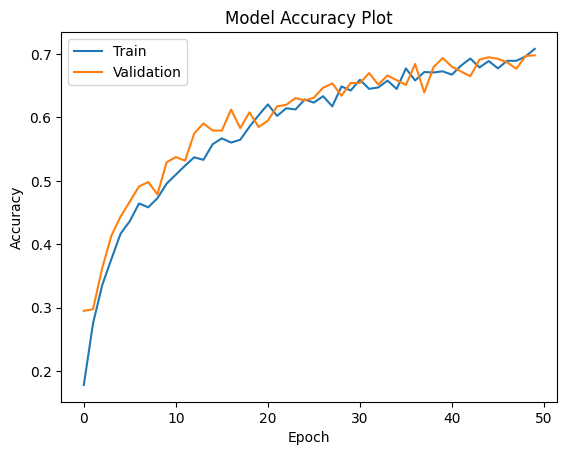

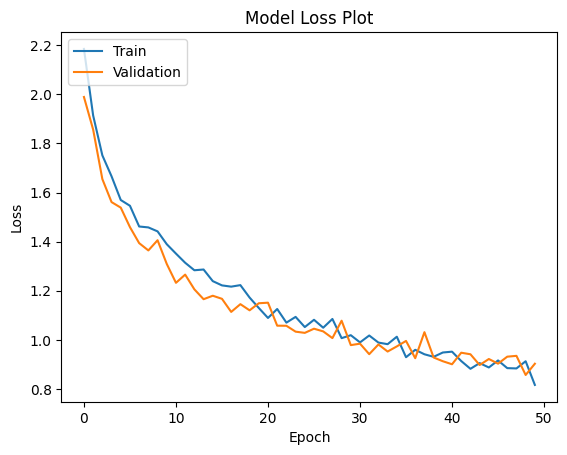

In [25]:
plt.plot(history.history["sparse_categorical_accuracy"])
plt.plot(history.history["val_sparse_categorical_accuracy"])
plt.title("Model Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [ ]:
def create_model_2():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same")(inputs)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same")(inputs)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

    x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    predictions = tf.keras.layers.Dense(10, activation="softmax")(x)

    model = tf.keras.models.Model(inputs=inputs, outputs=predictions)
    return model

In [ ]:
model_2 = create_model_2()
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history_2 = model_2.fit(x_train, y_train, epochs=50, batch_size=32, steps_per_epoch=200,
                    verbose=2, validation_steps=50, validation_split=0.2)

In [ ]:
model_2.evaluate(x_train, y_train)
model_2.evaluate(x_test, y_test)

In [ ]:
plt.plot(history_2.history["sparse_categorical_accuracy"])
plt.plot(history_2.history["val_sparse_categorical_accuracy"])
plt.title("Model Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

plt.plot(history_2.history["loss"])
plt.plot(history_2.history["val_loss"])
plt.title("Model Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Классификация изображений с помощью предварительно обущенных моделей

**НЕ ЗАПУСКАТЬ!**

Вычесления слишком долгие и коллабу нехватает мощностей. Только на своей машине либо с платной подпиской

In [ ]:
def create_model_3():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))
    resize = tf.keras.layers.UpSampling2D(size=(7, 7)) (inputs)

    base_model_output = tf.keras.applications.vgg16.VGG16(
        include_top=False,
        input_shape=(224, 224, 3),
        weights="imagenet"
    )(resize)

    x = tf.keras.layers.GlobalAveragePooling2D()(base_model_output)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    pred = tf.keras.layers.Dense(10, activation="softmax")(x)

    model = tf.keras.models.Model(inputs=inputs, outputs=pred)
    return model

In [ ]:
model_3 = create_model_3()
model_3.summary()

In [ ]:
model_3.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history_3 = model_3.fit(x_train, y_train, epochs=5, batch_size=64,
                        verbose=2, validation_split=0.2)

In [ ]:
model_3.evaluate(x_train, y_train)
model_3.evaluate(x_test, y_test)


plt.plot(history_3.history["sparse_categorical_accuracy"])
plt.plot(history_3.history["val_sparse_categorical_accuracy"])
plt.title("Model Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

plt.plot(history_3.history["loss"])
plt.plot(history_3.history["val_loss"])
plt.title("Model Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

Выше было VGG16, ниже будет представлено обучение с переносом на основе resnet50

In [9]:
def create_model_4():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))
    resize = tf.keras.layers.UpSampling2D(size=(7, 7)) (inputs)

    base_model_output = tf.keras.applications.resnet.ResNet50(
        include_top=False,
        input_shape=(224, 224, 3),
        weights="imagenet"
    )(resize)

    x = tf.keras.layers.GlobalAveragePooling2D()(base_model_output)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    pred = tf.keras.layers.Dense(10, activation="softmax")(x)

    model = tf.keras.models.Model(inputs=inputs, outputs=pred)
    return model

In [10]:
model_4 = create_model_4()
model_4.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,215,818 (100.01 MB)

 Trainable params: 26,162,698 (99.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

# Использование пользовательских изображений для классификации

(32, 32, 3)


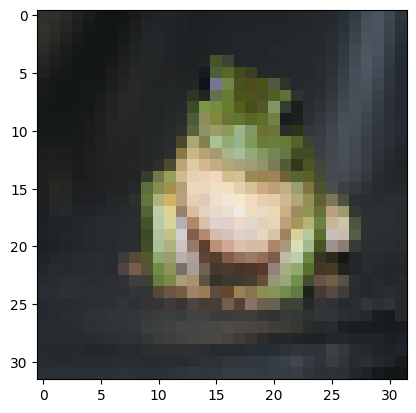

In [29]:
from PIL import Image
im = Image.open("./test.jpg")
im = np.array(im)
im = im[:, :, :3]
im = im / 255.0
print(im.shape)
plt.imshow(im)

In [31]:
im = im.reshape(1, 32, 32, 3)
pred = model.predict(im)
meta_dict[b"label_names"][np.argmax(pred[0])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


b'frog'